# ML Plus Elo

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

%matplotlib inline 

In [8]:
data_dir = '../data/'
os.listdir(data_dir)

['latest_data.csv', 'historical_data.csv']

In [9]:
data = pd.read_csv(data_dir + 'historical_data.csv')

In [12]:
data.isna().sum()

date                  0
season                0
neutral               0
playoff           15964
team1                11
team2                11
elo1_pre             11
elo2_pre             11
elo_prob1            11
elo_prob2            11
elo1_post           161
elo2_post           161
qbelo1_pre         2323
qbelo2_pre         2323
qb1                2177
qb2                2176
qb1_value_pre      2173
qb2_value_pre      2173
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2173
qbelo_prob2        2173
qb1_game_value     2323
qb2_game_value     2323
qb1_value_post     2323
qb2_value_post     2323
qbelo1_post        2323
qbelo2_post        2323
score1              161
score2              161
dtype: int64

In [17]:
data = data[np.logical_not(data['score1'].isna())]
data = data[np.logical_not(data['score2'].isna())]

In [18]:
data.isna().sum()

date                  0
season                0
neutral               0
playoff           15814
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post             0
elo2_post             0
qbelo1_pre         2162
qbelo2_pre         2162
qb1                2162
qb2                2162
qb1_value_pre      2162
qb2_value_pre      2162
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2162
qbelo_prob2        2162
qb1_game_value     2162
qb2_game_value     2162
qb1_value_post     2162
qb2_value_post     2162
qbelo1_post        2162
qbelo2_post        2162
score1                0
score2                0
dtype: int64

In [19]:
data = data[data['season'] > 1959]

In [23]:
data = data[data['score1'] != data['score2']]

In [24]:
data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,elo_sum,elo_diff,elo_asym
2903,1960-09-09,1960,0,NaN,NE,DEN,1300.000,1300.000,0.592466,0.407534,...,122.760000,1.254000,32.931770,1283.942071,1316.057929,10.0,13.0,2600.000,0.000,0.000000
2904,1960-09-10,1960,0,NaN,LAC,KC,1300.000,1300.000,0.592466,0.407534,...,153.120000,31.614000,11.872908,1305.532159,1294.467841,21.0,20.0,2600.000,0.000,0.000000
2905,1960-09-11,1960,0,NaN,OAK,TEN,1300.000,1300.000,0.592466,0.407534,...,238.920000,14.718000,86.530014,1270.748277,1329.251723,22.0,37.0,2600.000,0.000,0.000000
2906,1960-09-11,1960,0,NaN,NYJ,BUF,1300.000,1300.000,0.592466,0.407534,...,-67.650000,11.682000,36.502993,1329.638852,1270.361148,27.0,3.0,2600.000,0.000,0.000000
2907,1960-09-16,1960,0,NaN,OAK,KC,1266.146,1294.513,0.552525,0.447475,...,185.463743,3.620474,29.231991,1237.400627,1327.815491,16.0,34.0,2560.659,-28.367,-0.011078


In [25]:
def add_elo_features(data):
    """ Based on the elo rating for the two teams, 
        create new features.  Here, elo1 is assumed
        to be the home team.
        
        The data is modified inplace.
    """
    data['elo_sum'] = data['elo1_pre'] + data['elo2_pre']
    data['elo_diff'] = data['elo1_pre'] - data['elo2_pre']
    data['elo_asym'] = data['elo_diff'] / data['elo_sum']

In [26]:
add_elo_features(data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [32]:
def add_targets(data):
    """ Add targets based on the game outcome. """
    
    # Did the home team win? Note, ties are removed.
    data['outcome'] = data['score1'] > data['score2']
    data['outcome'] = data['outcome'].astype(np.int)
    
    data['point_sum'] = data['score1'] + data['score2']
    data['point_diff'] = data['score1'] - data['score2']
    data['point_asym'] = data['point_diff'] / data['point_sum']

In [33]:
add_targets(data)

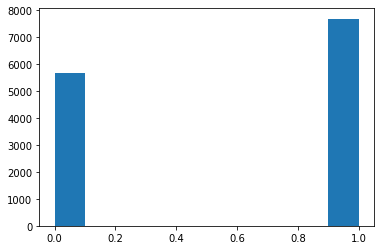

In [39]:
plt.hist(data['outcome']);

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous ax

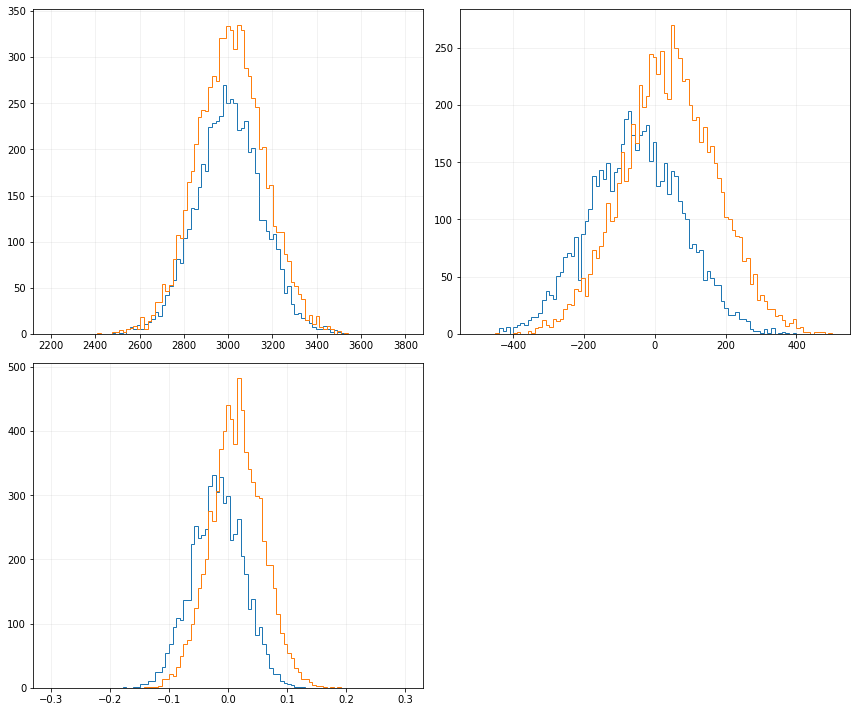

In [61]:
plt.figure(figsize=(12,10))

for outcome, subdata in data.groupby('outcome'):
    
    plt.subplot(2, 2, 1)
    plt.hist(subdata['elo_sum'], 
             bins=np.linspace(2200, 3800, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
    plt.subplot(2, 2, 2)
    plt.hist(subdata['elo_diff'], 
             bins=np.linspace(-500, 500, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
    plt.subplot(2, 2, 3)
    plt.hist(subdata['elo_asym'], 
             bins=np.linspace(-0.3, 0.3, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
plt.tight_layout()

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [89]:
features = ['elo_sum', 'elo_diff', 'elo_asym', 'elo_prob1']
target = ['outcome']

x_train, x_test, y_train, y_test = train_test_split(data[features], data[target])

In [90]:
x_train.shape, x_test.shape

((10013, 4), (3338, 4))

In [130]:
model = LogisticRegression()

In [131]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
model.coef_

array([[1.13230761e-04, 5.47793834e-03, 1.83649622e-06, 6.67062241e-06]])

In [96]:
y_pred = model.predict_proba(x_test)

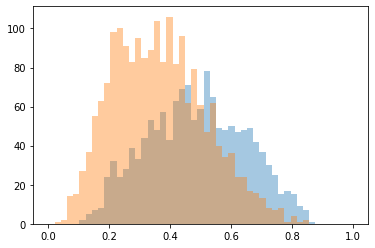

In [104]:
plt.hist(y_pred[np.where(y_test == 0)[0],0], bins=np.linspace(0,1,50), alpha=0.4);
plt.hist(y_pred[np.where(y_test == 1)[0],0], bins=np.linspace(0,1,50), alpha=0.4);

In [107]:
accuracy_score(y_test, y_pred[:,1].round())

0.6701617735170761

In [108]:
roc_auc_score(y_test, y_pred[:,1])

0.7086488389393698

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model = RandomForestClassifier(n_estimators=20, n_jobs=-1)

In [125]:
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [126]:
accuracy_score(y_test, y_pred[:,1].round())

0.5985620131815458

In [127]:
roc_auc_score(y_test, y_pred[:,1])

0.6186692231846065

In [128]:
model.feature_importances_

array([0.24497724, 0.24408679, 0.2574977 , 0.25343828])

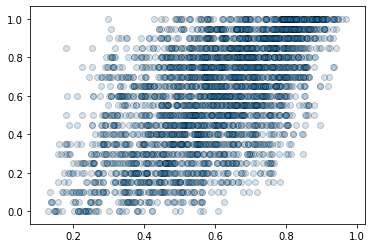

In [146]:
plt.scatter(x_test['elo_prob1'], y_pred[:,1], alpha=0.2, edgecolor='k')